<a href="https://colab.research.google.com/github/atteeqaazad7-gif/Fashion-Mnist/blob/main/fashionmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Classification using CNN
# This notebook implements a Convolutional Neural Network (CNN) to classify
# images from the Fashion MNIST dataset using TensorFlow and Keras.


In [2]:
#import all the necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import tensorflow.keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D


# Import dataset directly from kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fashionmnist' dataset.
Path to dataset files: /kaggle/input/fashionmnist



# Check the folders in the dataset

In [3]:
data = os.listdir(path)
print(data)

NameError: name 'path' is not defined

# Reading the test and train datafiles into the pandas dataframe


In [ ]:
train = pd.read_csv(path + "/fashion-mnist_train.csv")
test = pd.read_csv(path + "/fashion-mnist_test.csv")

# Get a quick overview of the dataset

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


# Labels in y


In [ ]:
(y_train , y_test) = train['label'] , test['label']

# Image data

In [ ]:
(x_train , x_test) = train.drop(['label'] , axis=1) , test.drop(['label'] , axis=1)

# Visualize first two images

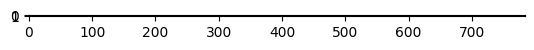

In [ ]:
#imshow(x_train[:2]) #does not work for grayscale images
imshow(x_train.iloc[0].values.reshape(28,28), cmap='gray')
imshow(x_train.iloc[1].values.reshape(28,28), cmap='gray')



# PreProcess the data

In [ ]:
x_train.shape #check shape

(60000, 784)

# Reshape the training images

In [ ]:
x_train = x_train.values.reshape(-1 , 28 , 28 , 1)
x_test = x_test.values.reshape(-1 , 28 , 28 , 1)

# Normalizing pixel values to [0 , 1]

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# Again check Shape

In [ ]:
x_train.shape

(60000, 28, 28, 1)

# Convert images to arrays


In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Build Convolutional Neural Network

# Creating model instance

In [ ]:
model = models.Sequential()

In [ ]:
#first convolutional layer
model.add(Conv2D(32 , (3,3) , activation= 'relu' , input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
#second convolutional layer
model.add(Conv2D(64 , (3,3) , activation= 'relu'))
model.add(MaxPooling2D((2,2)))
#third convolutional layer
model.add(Conv2D(64 , (3,3) , activation= 'relu'))
#flatten and dense layers
model.add(Flatten())
model.add(Dense(64 , activation= 'relu'))
model.add(Dense(10 , activation= 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Summary of model

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [ ]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'] )

# Train the model

In [ ]:
model.fit(x_train , y_train , epochs=15 , batch_size=32)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8571 - loss: 0.3835
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8642 - loss: 0.3691
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8643 - loss: 0.3699
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8681 - loss: 0.3574
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8737 - loss: 0.3482
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8738 - loss: 0.3435
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8757 - loss: 0.3369
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8808 - loss: 0.3268
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8799 - loss: 0.3238
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8830 - loss: 0.3130
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8837 - loss: 0.3137
Epoch 12/15
1875/1875 ━━━

# Predict

In [ ]:
model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[7.4733669e-01, 3.6526766e-09, 2.8892120e-04, ..., 3.5304298e-13,
        1.9137107e-04, 1.1903055e-09],
       [1.7165722e-07, 9.9999440e-01, 9.3779278e-09, ..., 3.0444434e-14,
        5.5124705e-10, 1.8452236e-11],
       [6.3921623e-03, 3.2534501e-07, 8.2031643e-01, ..., 2.7360070e-12,
        2.9296431e-05, 1.3696393e-07],
       ...,
       [7.2281949e-07, 2.9282840e-14, 2.7147239e-08, ..., 1.5689935e-08,
        9.9997985e-01, 2.3887667e-09],
       [3.6774315e-03, 1.3062971e-04, 1.1372472e-03, ..., 2.1062940e-06,
        9.8688412e-01, 2.5271685e-05],
       [2.4832545e-02, 3.3338779e-01, 2.6599213e-01, ..., 1.4216189e-05,
        6.4598158e-02, 6.8484756e-06]], dtype=float32)

In [ ]:
model.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8789 - loss: 0.3269


[0.3193431496620178, 0.8822000026702881]

# Shows the mistakes

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Number of mistakes: 1178


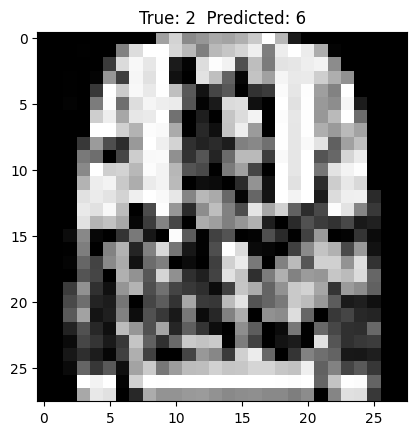

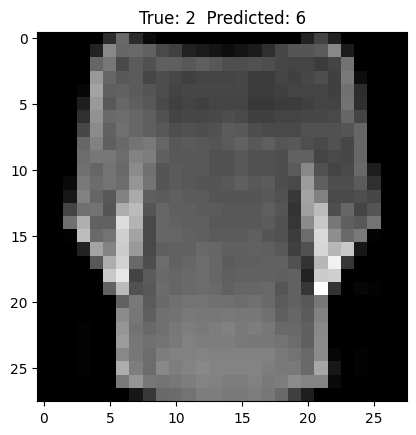

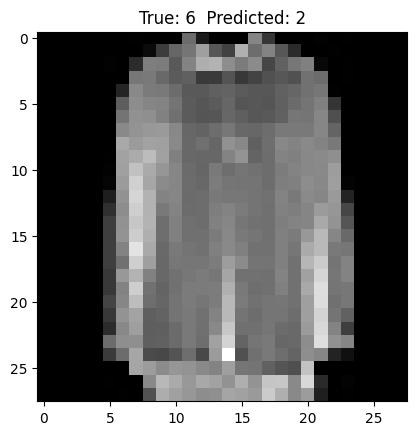

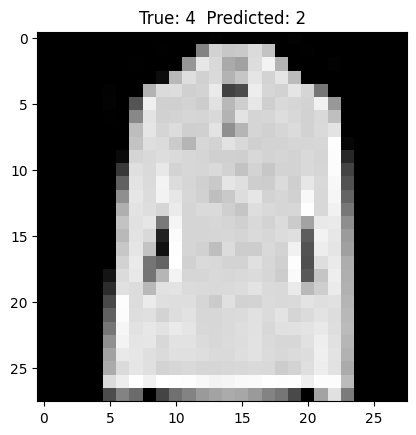

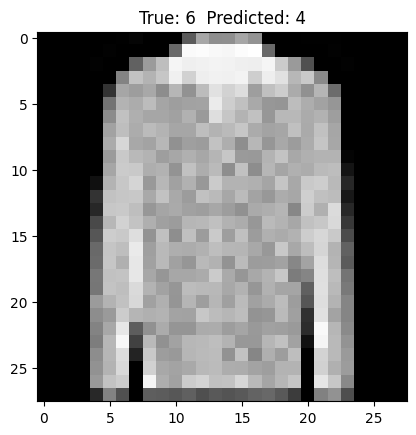

In [ ]:
pred_labels = np.argmax(model.predict(x_test), axis=1)
wrong_idx = np.where(pred_labels != y_test)[0]

print("Number of mistakes:", len(wrong_idx))
# show a few wrong predictions
for i in wrong_idx[:5]:
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"True: {y_test[i]}  Predicted: {pred_labels[i]}")
    plt.show()